In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
# !git clone https://github.com/agconti/kaggle-titanic.git

# train = pd.read_csv('data/train.csv')
# test = pd.read_csv('kaggle-titanic/test.csv')


Saving test.csv to test.csv
Saving train.csv to train.csv
User uploaded file "test.csv" with length 28629 bytes
User uploaded file "train.csv" with length 61194 bytes


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# Detecting null values and records
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Target')

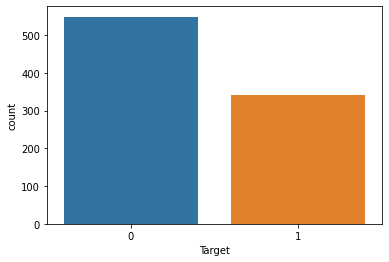

In [ ]:
sns.countplot(train.Survived)
plt.xlabel('Target')

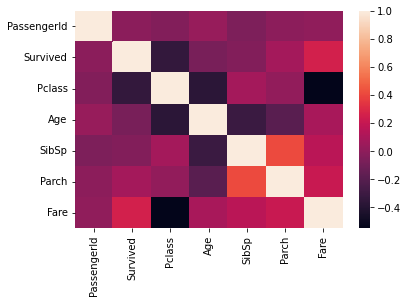

In [ ]:
# def clean(data):
#  data.drop(["Ticket",'Embarked','Name'],inplace=True, axis=1)
#  return data
# train = clean(train)
# test = clean(test)
# Top 5 pcclass:
# top_5 = train.groupby(['Age']).count().sort_values(by = 'Survived',ascending=False)[:5]
# plt.figure(figsize=(8,10))
# sns.barplot(x=top_5,y = top_5.index)
# plt.xlabel('Number of Passengers')
mat_corr = train.corr()
# mat_corr
sns.heatmap(mat_corr)

In [ ]:
from sklearn.model_selection import train_test_split

y = train.Survived
x = train.drop('Survived', axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(x, y)

In [ ]:
tmp =(X_train.dtypes =='object')
categ_columns = list(tmp[tmp].index)
num_columns = list(X_train.columns)

for col in categ_columns:
  num_columns.remove(col)

print(categ_columns)
print(num_columns)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_transformer = SimpleImputer(strategy='median')
categ_transformer =Pipeline(steps=[('encoding',OrdinalEncoder(handle_unknown='use_encoded_value',  unknown_value=np.nan)),
                                   ('imputation',SimpleImputer(strategy='mean'))])

prepressor = ColumnTransformer(transformers=[('num', num_transformer, num_columns),('categ', categ_transformer, categ_columns)])


In [ ]:
from sklearn.ensemble import RandomForestClassifier


model =  RandomForestClassifier(max_depth=7, random_state=0)

trainer = Pipeline(steps=[('prepressor',prepressor),('model',model)])

trainer.fit(X_train,y_train)
predictions = trainer.predict(X_valid)


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_valid,predictions) 

In [ ]:
submission_preds = trainer.predict(test)
df = pd.DataFrame({"PassengerId":test.PassengerId,
                   "Survived":submission_preds})

df.to_csv("submission.csv", index=False)